In [ ]:
!pip install rasa==1.10.3

In [ ]:
!pip install nest_asyncio==1.3.3

In [ ]:
!python -m spacy download en

In [ ]:
import os
import rasa
import nest_asyncio

nest_asyncio.apply() # Se aplica la asincronía a todo el proyecto

In [ ]:
from rasa.cli.scaffold import create_initial_project # Se crea un proyecto inicial

In [ ]:
proyecto = "proyecto-chatbot-TFG" # Nombre del proyecto
create_initial_project(proyecto) # Se inicia el proyecto

In [ ]:
# Cambio de directorio al del proyecto 
# Y muestra de los archivos que se encuentran en él
os.chdir(proyecto)
print(os.listdir("."))

In [ ]:
config = "config.yml"
archivos_entrenamiento = "data/"
dominio = "domain.yml"
salida = "models/"

In [ ]:
ruta_modelo = rasa.train(dominio, config, [archivos_entrenamiento], salida) 
# Archivos_entrenamiento se pasa como lista, por eso va entre corchetes
print(ruta_modelo)

In [ ]:
from rasa.jupyter import chat

puntoFinal = "endpoints.yml"

chat(ruta_modelo, puntoFinal)

Your bot is ready to talk! Type your messages here or send '/stop'.
/stop


In [ ]:
%%writefile data/nlu.md

## intent:buy_product
- i want to buy the product
- i want to buy a product

## intent:number_product
- i want only [1](number)
- i want [2](number) please
- i need [3](number) products
- i would like [4](number) products
- may i have [5](number)?
- can i get [6](number)?

## intent:email
- fulanito@gmail.com
- menganito@hotmail.com

## intent:greet
- hey
- hello
- hi
- good morning
- good evening
- hey there

## intent:goodbye
- bye
- goodbye
- see you around
- see you later

## intent:affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- wonderful
- I am feeling very good
- I am great
- I'm good

## intent:mood_unhappy
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not very good
- extremely sad
- so sad

## intent:bot_challenge
- are you a bot?
- are you a human?
- am I talking to a bot?
- am I talking to a human?
- what are you?

Overwriting data/nlu.md


In [ ]:
%%writefile domain.yml

intents:
  - greet
  - goodbye
  - affirm
  - deny
  - mood_great
  - mood_unhappy
  - bot_challenge
  - buy_product
  - number_product
  - email

responses:
  utter_buy_product:
  - text:"how many products do you want to buy?"

  utter_number_product:
  - text: "Alright. May I have your personal e-mail so one of our agents may get in touch with you? (yes/no)"

  utter_affirm:
  - text: "Please, write down your personal e-mail."

  utter_deny:
  - text: "Please, write /stop to end the chat."

  utter_greet:
  - text: "Hey! How are you?"

  utter_cheer_up:
  - text: "Here is something to cheer you up:"
    image: "https://static.boredpanda.com/blog/wp-content/uploads/2019/10/wholesome-cute-duck-pics-12-5da038b0c5f37__700.jpg"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_happy:
  - text: "Great!"

  utter_goodbye:
  - text: "Bye, see you soon!"

  utter_iamabot:
  - text: "I am a bot, powered by Rasa and Alberto C."

entities:
  - number

session_config:
  session_expiration_time: 60
  carry_over_slots_to_new_session: true


Overwriting domain.yml


In [ ]:
%%writefile data/stories.md

## process completed
* greet
  - utter_greet
* buy_product
  - utter_buy_product
* number_product
  - utter_number_product
* affirm
  - utter_affirm
* email
  - utter_happy
  - utter_goodbye
  - utter_deny

## process incompleted
* greet
  - utter_greet
* buy_product
  - utter_buy_product
* number_product
  - utter_number_product
* deny
  - utter_goodbye
  - utter_deny

## happy path
* greet
  - utter_greet
* mood_great
  - utter_happy

## sad path 1
* greet
  - utter_greet
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help

## sad path 2
* greet
  - utter_greet
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help

## say goodbye
* goodbye
  - utter_goodbye

## bot challenge
* bot_challenge
  - utter_iamabot

In [ ]:
ruta_modelo = rasa.train(dominio, config, [archivos_entrenamiento], salida)
print(ruta_modelo)

In [ ]:
chat(ruta_modelo, puntoFinal)

In [ ]:
import rasa.data as data

stories_directory, nlu_data_directory = data.get_core_nlu_directories(archivos_entrenamiento)

print(stories_directory, nlu_data_directory)

100%|██████████| 54/54 [00:00<00:00, 100.81it/s]


Testeado finalizado.


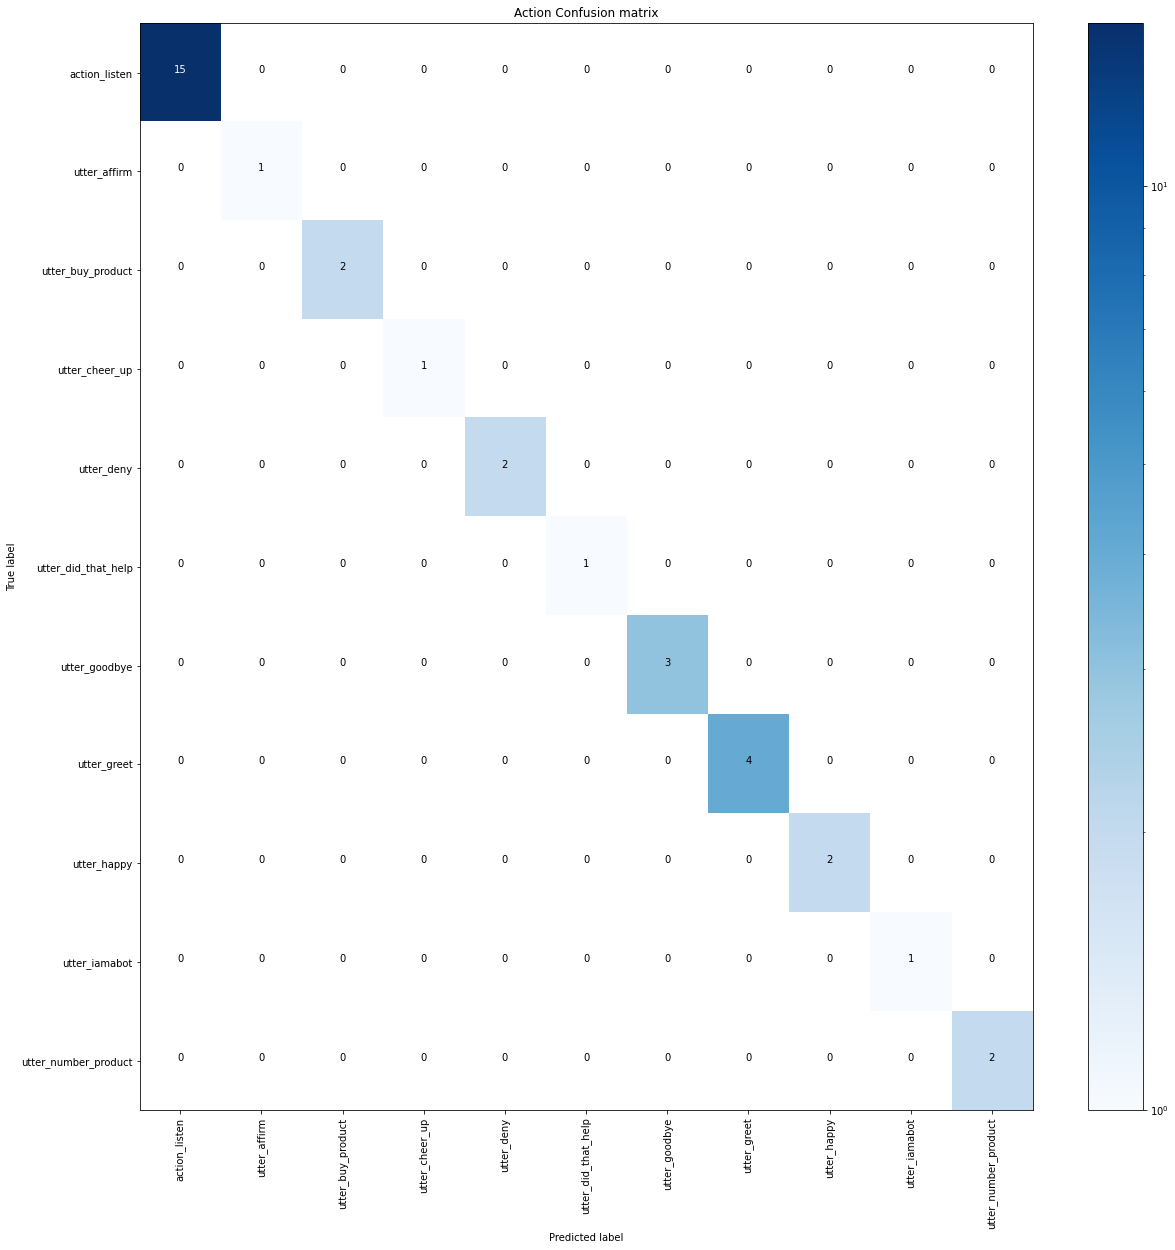

In [ ]:
rasa.test(ruta_modelo, stories_directory, nlu_data_directory)

print("Testeado finalizado.")